In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy

In [25]:
# Change this to analyze a different file.
fileName = "results_uptok20_1681061505.csv"
df = pd.read_csv(fileName)

df.head()

,k,Messages,UpperBound,Time,Success
0,2,11,11,0,1
1,2,9,11,0,1
2,2,11,11,0,1
3,2,11,11,457300,1
4,2,11,11,495700,1


Number of Failed Experiments (Leader Was Not Successfully Elected): 0


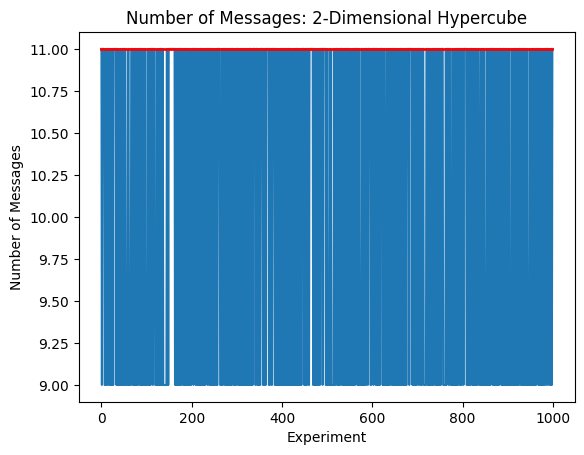

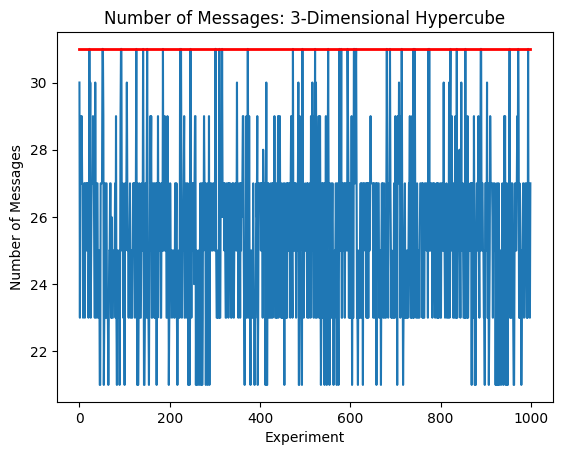

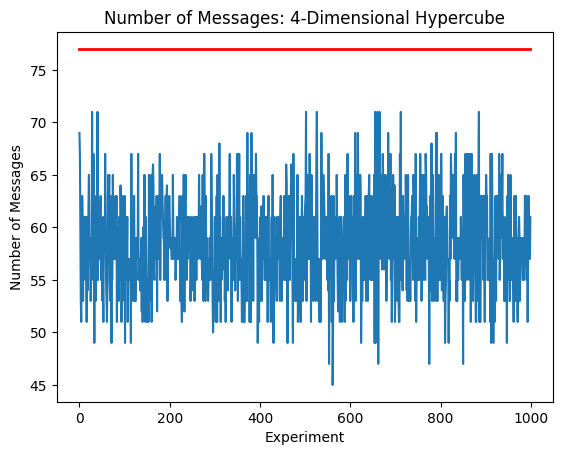

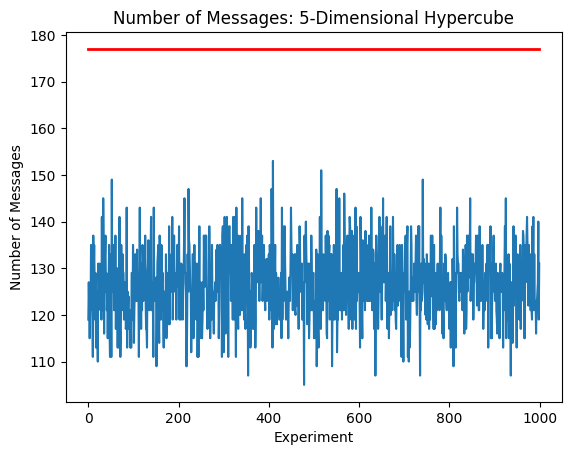

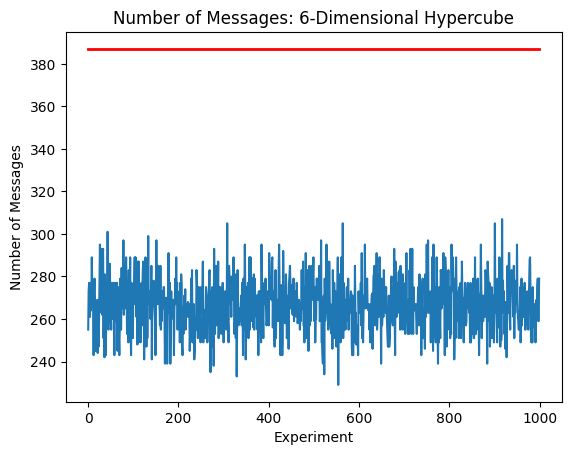

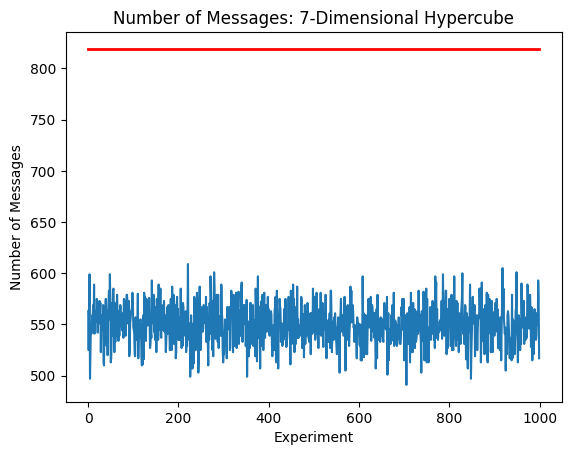

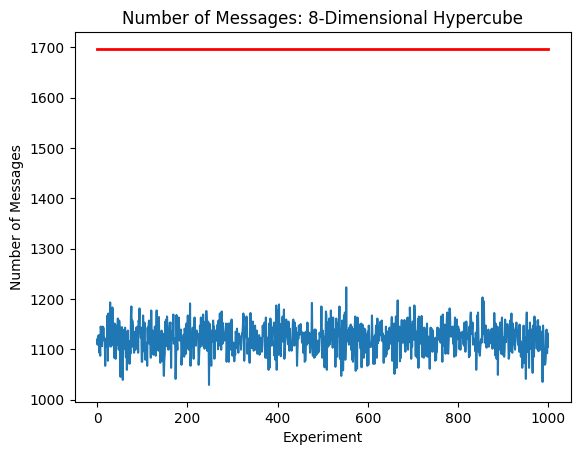

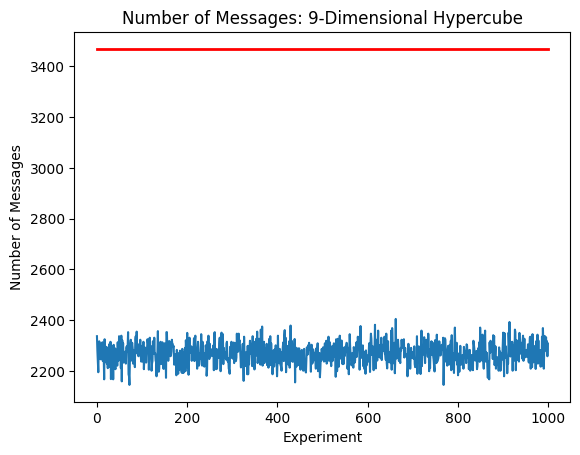

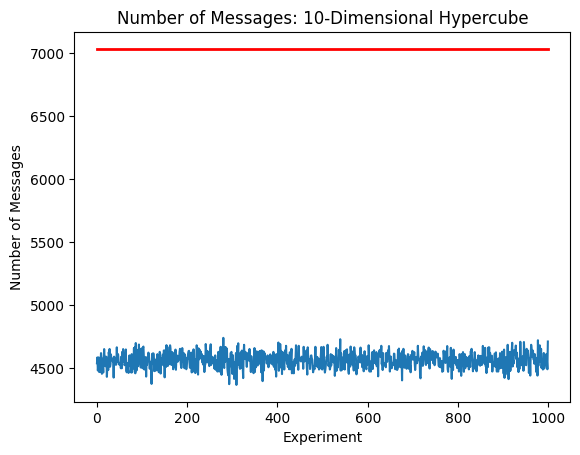

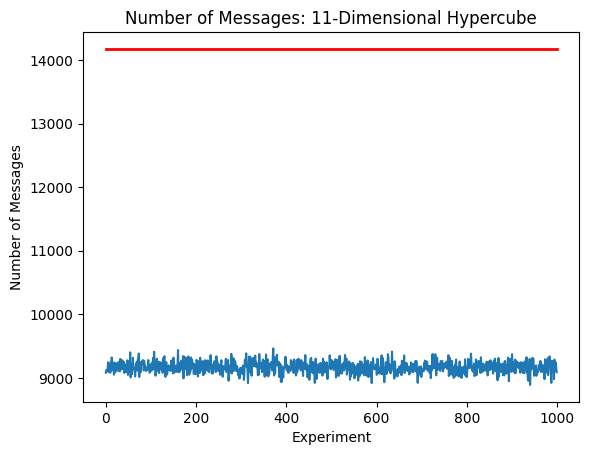

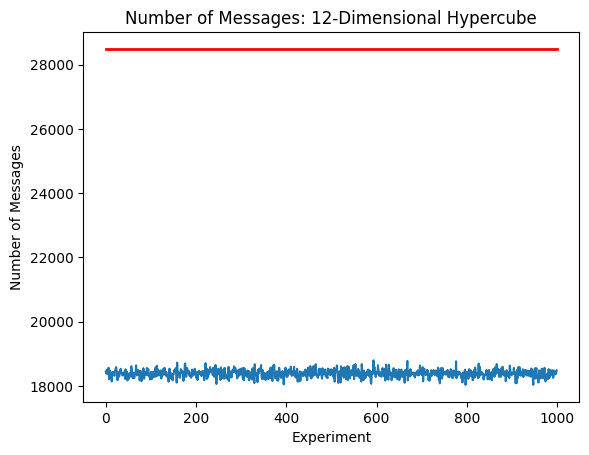

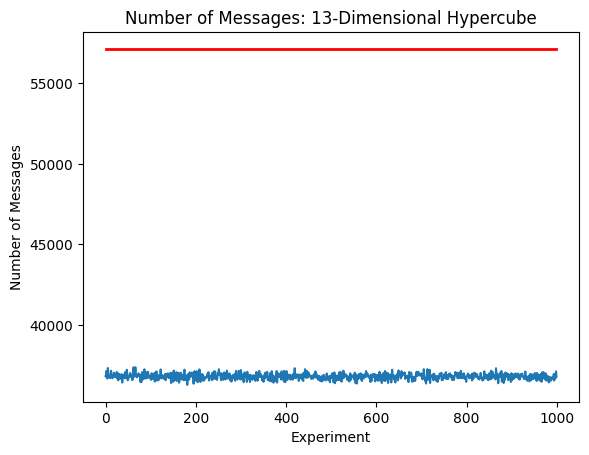

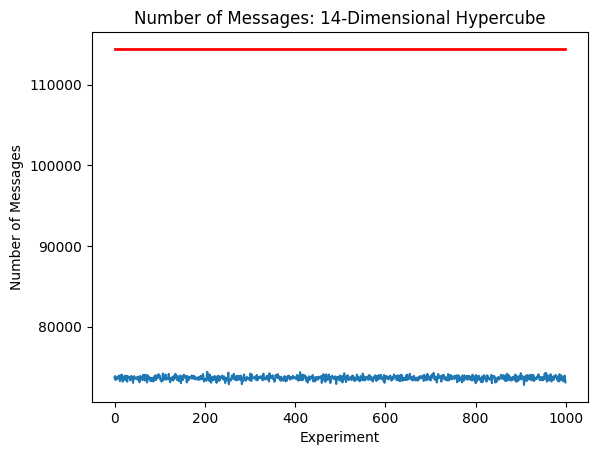

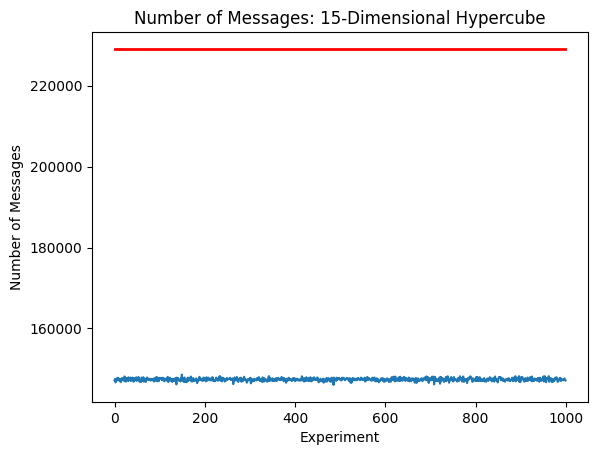

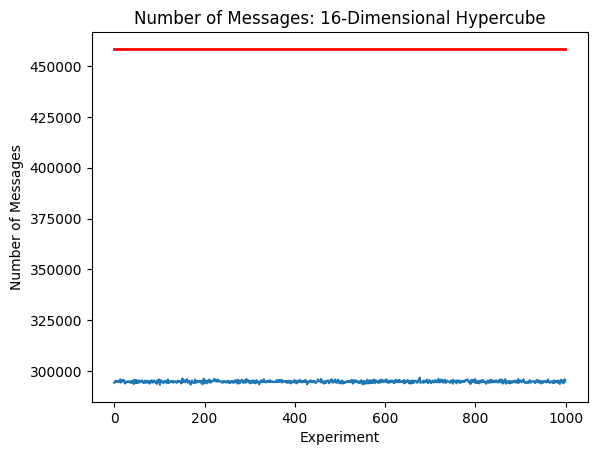

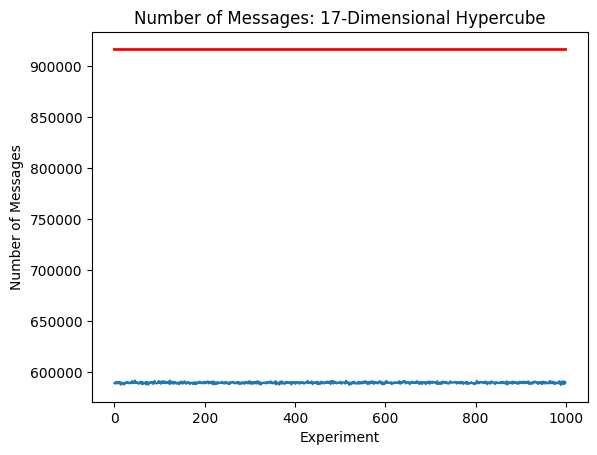

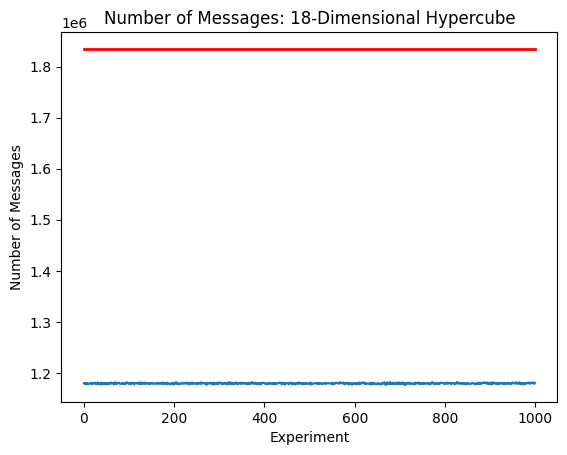

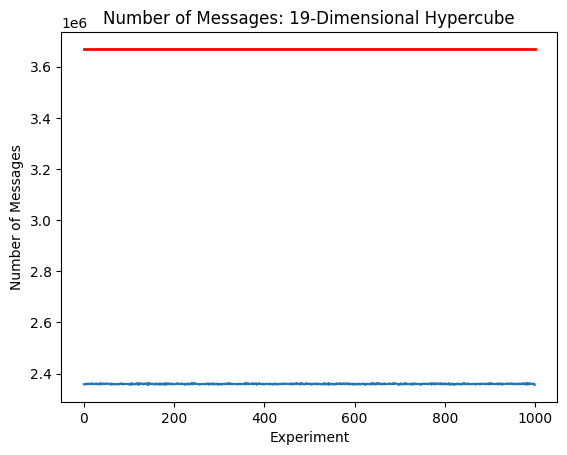

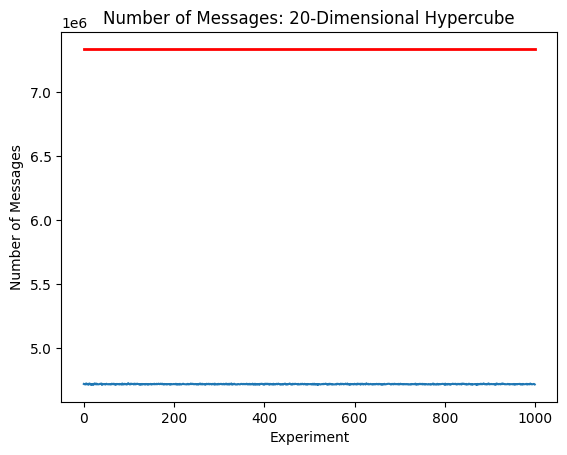

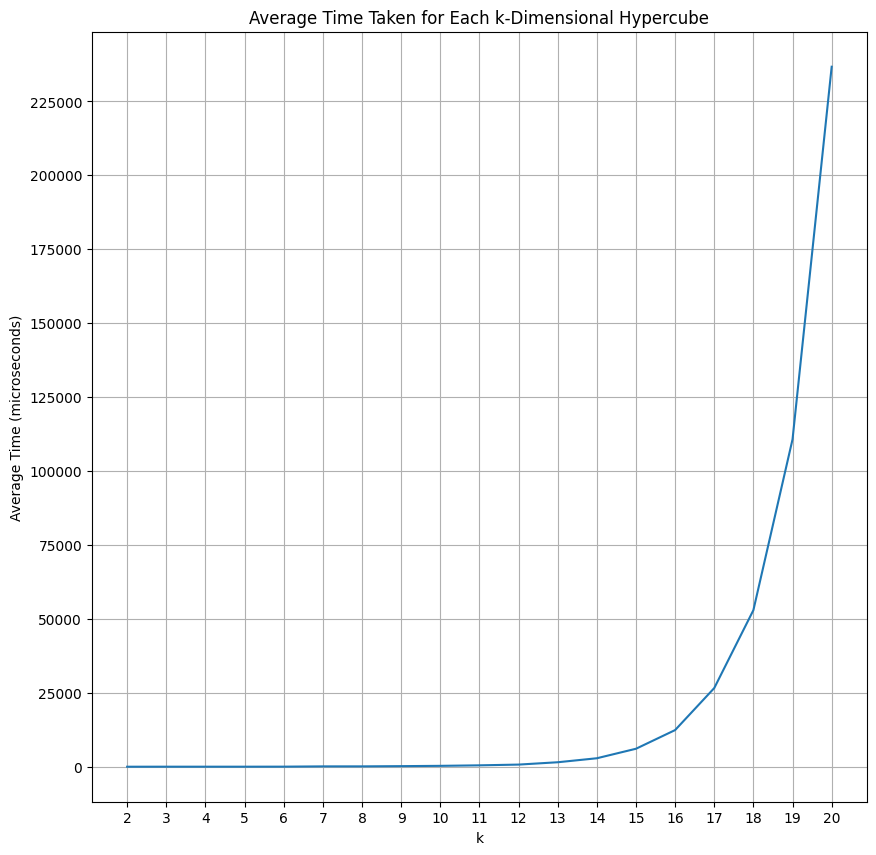

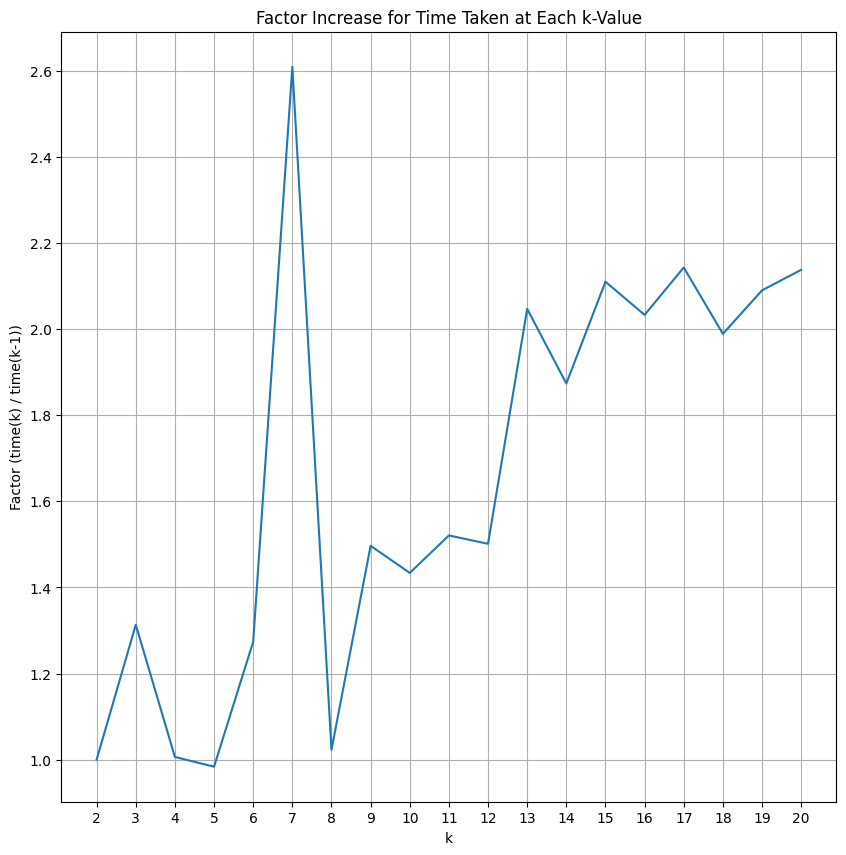

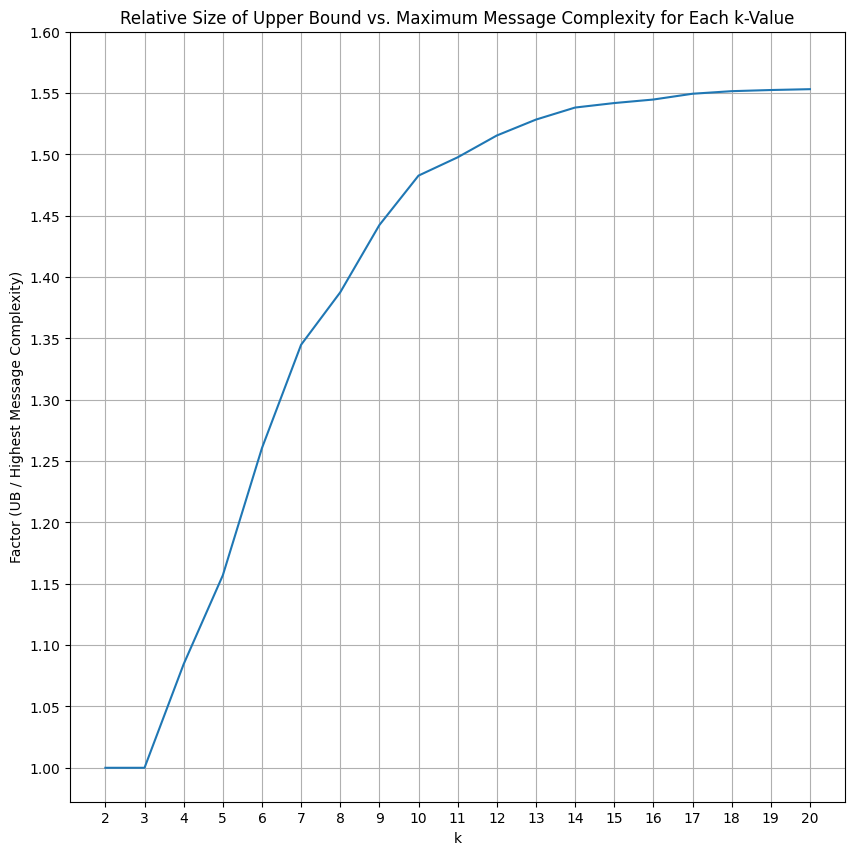

In [27]:
# Create results directory and update path to use to save images.
filePrefix = fileName.split('.')[0]
filePath = os.getcwd() + "/" + f"{filePrefix}"

os.mkdir(filePath)
filePath = filePath + "/"

numFailures = len(df[df["Success"] == 0])
mean_times = []
k_values = []
print(f"Number of Failed Experiments (Leader Was Not Successfully Elected): {numFailures}")

k_list = np.array(df["k"])
min_k = np.min(k_list)
max_k = np.max(k_list)

num_samples = len(df[df["k"] == min_k])

message_factor = []

for i in range(min_k, max_k + 1):
    df_slice = df[df["k"] == i]

    times = np.array(df_slice[df_slice["Time"] != 0])
    mean_times.append(np.mean(times) / 1000)
    k_values.append(i)

    message_factor.append(np.mean(np.array(df_slice["UpperBound"])) / np.max(np.array(df_slice["Messages"])))

    plt.plot(np.arange(0, num_samples), df_slice["Messages"])
    plt.title(f'Number of Messages: {i}-Dimensional Hypercube')
    plt.xlabel('Experiment')
    plt.ylabel('Number of Messages')
    plt.plot(np.arange(0, num_samples), df_slice["UpperBound"], color="red", linestyle='-', linewidth=2)
    plt.savefig(filePath + f"k{i}.jpg")
    plt.show()

plt.figure(figsize=(10,10))
plt.plot(k_values, mean_times)
plt.title(f'Average Time Taken for Each k-Dimensional Hypercube')
plt.xlabel('k')
plt.xticks(np.arange(min_k, max_k+1))
plt.yticks(np.arange(0, 250000, 25000))
plt.grid()
plt.ylabel('Average Time (microseconds)')
plt.savefig(filePath + f"avg_time.jpg")
plt.show()

delta_time = deepcopy(mean_times)
delta_time[0] = 1

for i in range(1, len(delta_time)):
    delta_time[i] = mean_times[i] / mean_times[i-1]

plt.figure(figsize=(10,10))
plt.plot(k_values, delta_time)
plt.title(f'Factor Increase for Time Taken at Each k-Value')
plt.xlabel('k')
plt.xticks(np.arange(min_k, max_k+1))
plt.grid()
plt.ylabel('Factor (time(k) / time(k-1))')
plt.savefig(filePath + f"factor_increase_time.jpg")
plt.show()

plt.figure(figsize=(10,10))
plt.plot(k_values, message_factor)
plt.title(f'Relative Size of Upper Bound vs. Maximum Message Complexity for Each k-Value')
plt.xlabel('k')
plt.xticks(np.arange(min_k, max_k+1))
plt.yticks(np.arange(1, 1.6, 0.05))
plt.grid()
plt.ylabel('Factor (UB / Highest Message Complexity)')
plt.savefig(filePath + f"factor_messages.jpg")
plt.show()